In [44]:
from utils import load_dataset
from transform import SimpleResize 
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
cdm_file='/n/netscratch/iaifi_lab/Lab/msliu/CMD/data/IllustrisTNG/Maps_Mstar_IllustrisTNG_LH_z=0.00.npy'
wdm_file='/n/netscratch/iaifi_lab/Lab/ccuestalazaro/DREAMS/Images/WDM/boxes/Maps_Mstar_IllustrisTNG_WDM_z=0.00.npy'

normalize = SimpleResize(
    size=(256, 256),
    scaling_scheme='log',
    normalize=True 
)

full_indices = range(100)

full_dataset = load_dataset(
    indices=full_indices, 
    transform=normalize,
    cdm_file=cdm_file,
    wdm_file=wdm_file
)
full_loader = DataLoader(full_dataset, batch_size=32, shuffle=True)


Loading CDM data from /n/netscratch/iaifi_lab/Lab/msliu/CMD/data/IllustrisTNG/Maps_Mstar_IllustrisTNG_LH_z=0.00.npy...
CDM data shape: (15000, 256, 256)
Loading WDM data from /n/netscratch/iaifi_lab/Lab/ccuestalazaro/DREAMS/Images/WDM/boxes/Maps_Mstar_IllustrisTNG_WDM_z=0.00.npy...
WDM data shape: (15360, 256, 256)
Created dataset with 200 samples


In [45]:
for idx, batch in enumerate(full_loader):
    imgs, lbls = batch
    if idx==0:
        break

tensor(0.) tensor(1.)


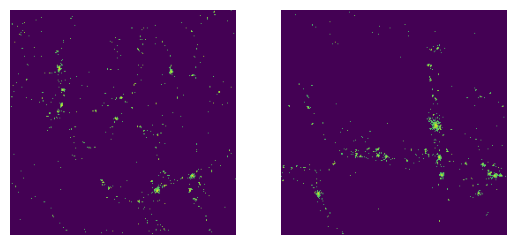

In [49]:
i=5

img = imgs[i,0]
img1 = imgs[i+1,0]

img = (img - img.mean()) / img.std()
img1 = (img1 - img1.mean()) / img1.std()

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img1)
plt.axis('off')
print(lbls[i],lbls[i+1])
plt.show()

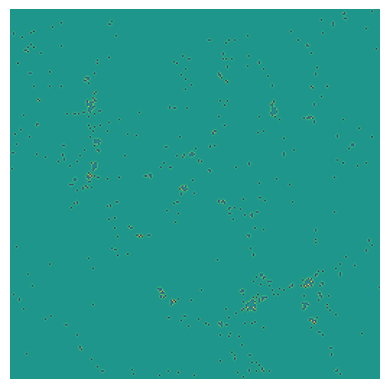

In [50]:
from scipy.ndimage import laplace

def high_pass(image):
    return laplace(image)

plt.imshow(high_pass(imgs[5,0]))
plt.axis('off')
plt.show()

In [52]:
img.max()

tensor(12.0795)